# BNLearn Demo

> pip install bnlearn

Agenda:

- Create syntetic dataset with causal relationships (chains, colliders, forks)
- Learn the causal structure
- Visualise result

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bnlearn as bn

## Create data

Variables:
- Cloudy
- Rain
- Sprinkler
- Grass wet

In [52]:
n_samples = 10000
cloudy = np.random.choice(2, p=[0.25, 0.75], size=n_samples)
rainy = cloudy * np.random.choice(2, p=[0.7, 0.3], size=n_samples)
sprinkler = (1-rainy) * (1-cloudy) * np.random.choice(2, p=[0.1, 0.9], size=n_samples)
grass_wet = np.maximum(rainy, sprinkler)
data = np.column_stack((cloudy, rainy, sprinkler, grass_wet))
df = pd.DataFrame(data, columns=["cloudy", "rainy", "sprinkler", "grass_wet"])
df

,cloudy,rainy,sprinkler,grass_wet
0,1,1,0,1
1,1,0,0,0
2,1,1,0,1
3,1,1,0,1
4,0,0,1,1
...,...,...,...,...
9995,0,0,1,1
9996,1,0,0,0
9997,0,0,1,1
9998,1,0,0,0


## Learn causal structure

In [53]:
model = bn.structure_learning.fit(df)
model = bn.independence_test(model, df)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute edge strength with [chi_square]


In [54]:
model.keys()

dict_keys(['model', 'model_edges', 'adjmat', 'config', 'structure_scores', 'independence_test'])

In [55]:
model['independence_test']

,source,target,stat_test,p_value,chi_square,dof
0,cloudy,sprinkler,True,0.000000e+00,8632.960636,1
1,cloudy,rainy,True,3.810332e-207,943.291723,1
2,rainy,grass_wet,True,0.000000e+00,3754.404848,1
3,sprinkler,grass_wet,True,0.000000e+00,3384.811202,1


## Visualise result

Draw causal graph

[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


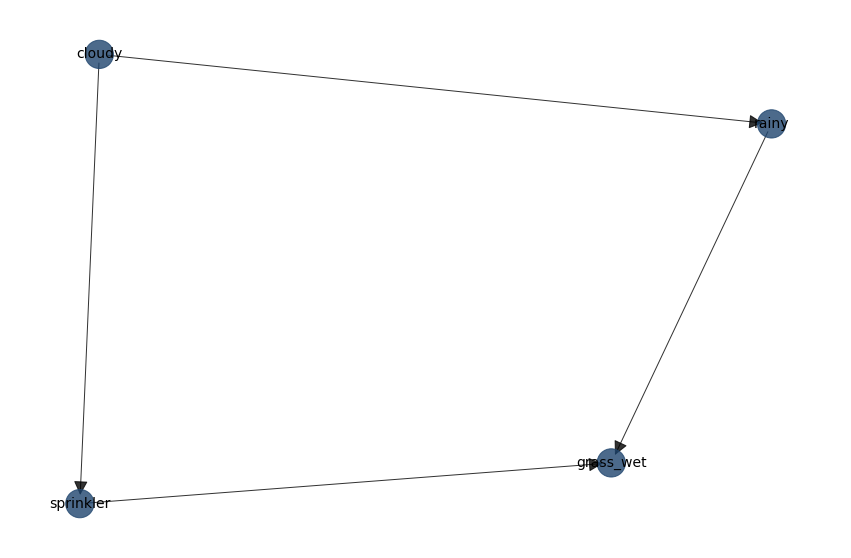

In [56]:
G = bn.plot(model)